<a href="https://colab.research.google.com/github/saga743k/Deep-Learning-Experiments/blob/main/Ex_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.3346 - loss: 1.7931 - val_accuracy: 0.5430 - val_loss: 1.2734
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 88ms/step - accuracy: 0.5641 - loss: 1.2225 - val_accuracy: 0.6100 - val_loss: 1.0959
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.6326 - loss: 1.0394 - val_accuracy: 0.6490 - val_loss: 0.9853
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.6709 - loss: 0.9382 - val_accuracy: 0.6756 - val_loss: 0.9315
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.7007 - loss: 0.8607 - val_accuracy: 0.6726 - val_loss: 0.9433
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.7220 - loss: 0.7968 - val_accuracy: 0.6901 - val_loss: 0.8869
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.7390 - loss: 0.7391 - val_accuracy: 0.6915 - val_loss: 0.8833
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.7565 - loss: 0.6962 - 

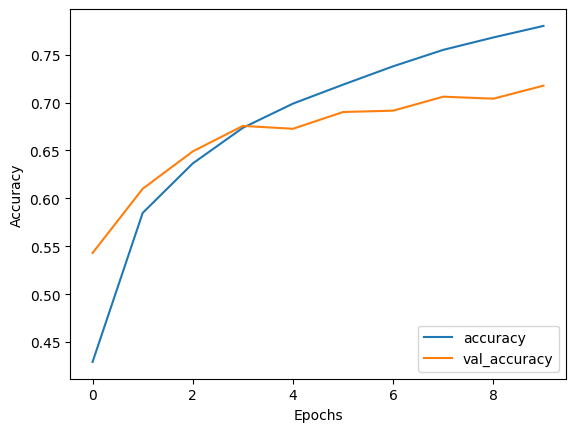

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the CNN model
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output and add Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Make Predictions (Optional)
predictions = model.predict(test_images)
print(np.argmax(predictions[0]))  # Print the predicted class for the first image